In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!ls /kaggle/usr/lib/utility_script_data_viz/utility_script_data_viz.py

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/usr/lib/utility_script_data_viz/utility_script_data_viz.py


# Analyse de donnée

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
Notebook Color Schema:


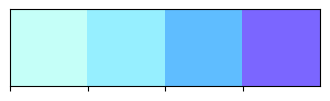

In [2]:
import utility_script_data_viz as dv

In [3]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
dv.missing_data(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Totale,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Types,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [11]:
dv.missing_data(test_df)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Totale,0,0,0,0,86,0,0,0,1,327,0
Percent,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0
Types,int64,int64,object,object,float64,int64,int64,object,float64,object,object


In [12]:
tt = dv.most_frequent_values(train_df)

In [13]:
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequence,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [14]:
dv.unique_values(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [15]:
train_df['set'] = "train"
test_df['set'] = "test"
dt = pd.concat([train_df,test_df])
dt.shape

(1309, 13)

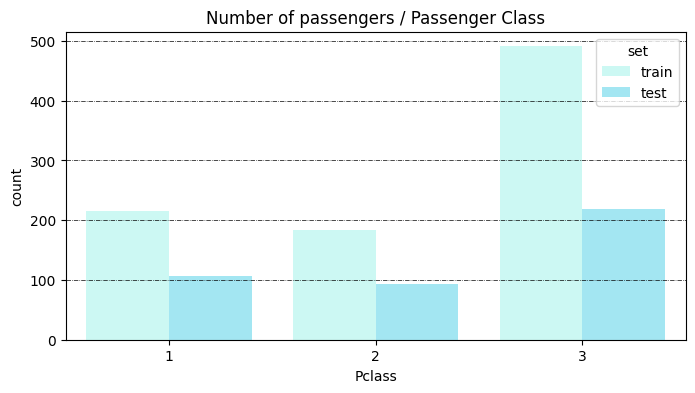

In [16]:
dv.plot_count_pairs(dt, 'Pclass', 'Passenger Class', hue="set")

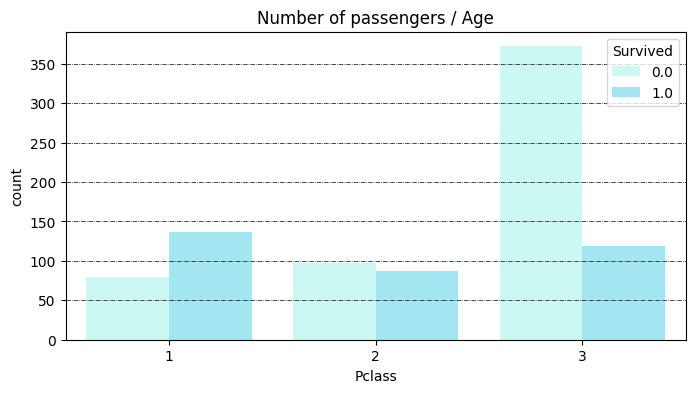

In [17]:
dv.plot_count_pairs(dt, 'Pclass', 'Age', hue="Survived")

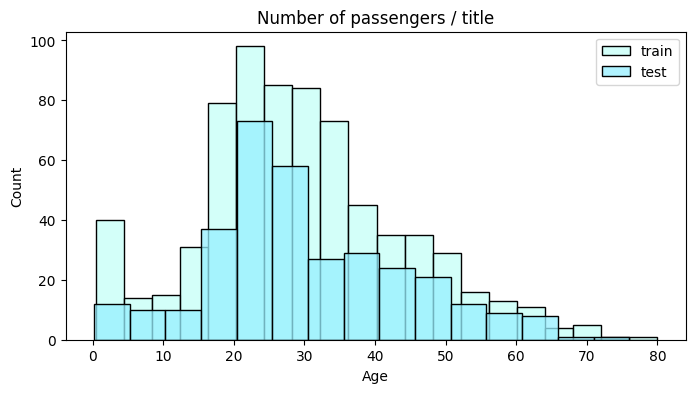

In [18]:
dv.plot_distribution_pairs(dt, 'Age', 'title', hue="set")

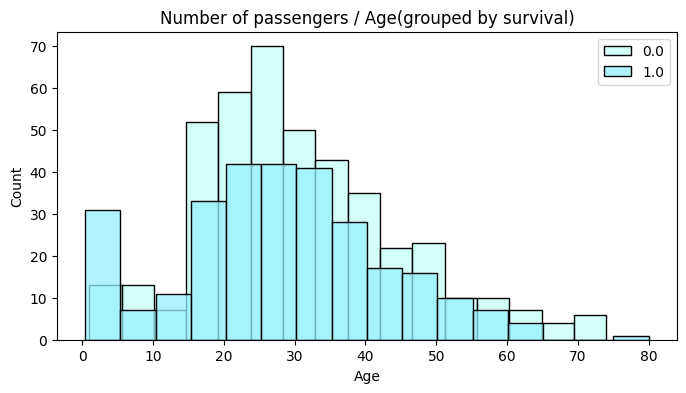

In [19]:
dv.plot_distribution_pairs(dt, 'Age', 'Age(grouped by survival)', hue="Survived")

In [20]:
dt["Family_size"] = (dt['Parch'] + dt['SibSp'])+1

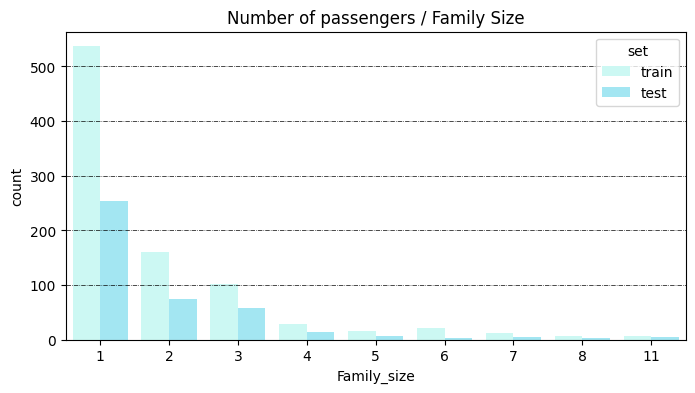

In [21]:
dv.plot_count_pairs(dt, 'Family_size', 'Family Size', hue="set")

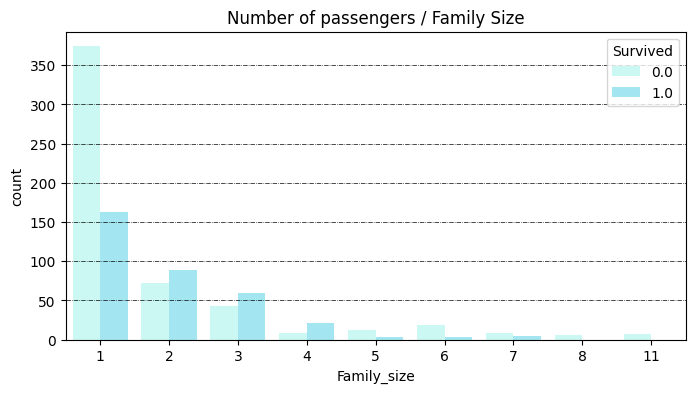

In [22]:
dv.plot_count_pairs(dt, 'Family_size', 'Family Size', hue="Survived")

In [23]:
dt["Age Interval"] = 0.0
dt.loc[ dt['Age'] <= 16, 'Age Interval']  = 0
dt.loc[(dt['Age'] > 16) & (dt['Age'] <= 32), 'Age Interval'] = 1
dt.loc[(dt['Age'] > 32) & (dt['Age'] <= 48), 'Age Interval'] = 2
dt.loc[(dt['Age'] > 48) & (dt['Age'] <= 64), 'Age Interval'] = 3
dt.loc[ dt['Age'] > 64, 'Age Interval'] = 4

In [24]:
train_df["Age Interval"] = 0.0
train_df.loc[train_df['Age'] <= 16, 'Age Interval']  = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age Interval'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age Interval'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age Interval'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age Interval'] = 4

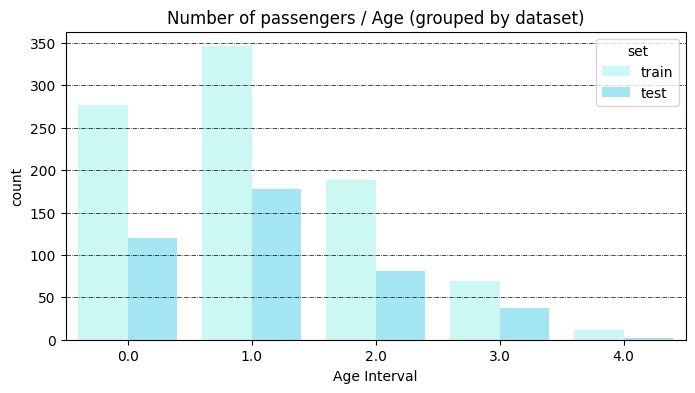

In [25]:
dv.plot_count_pairs(dt, "Age Interval", "Age (grouped by dataset)")

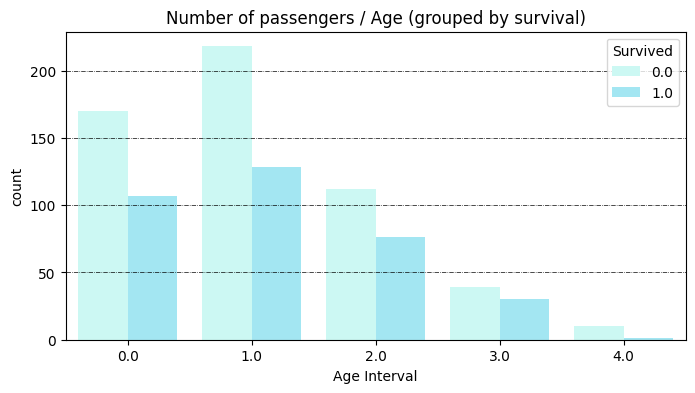

In [26]:
dv.plot_count_pairs(dt, "Age Interval", "Age (grouped by survival)", hue="Survived")


In [27]:
dt[['Family Name','Title','Given Name' , 'Maiden Name']] = dt.apply(lambda row: dv.parse_names(row), axis=1)

In [28]:
dt.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Family_size,Age Interval,Family Name,Title,Given Name,Maiden Name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,2,1.0,Braund,Mr.,Owen Harris,None
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2,2.0,Cumings,Mrs.,John Bradley,Florence Briggs Thayer


In [29]:
np.transpose(pd.crosstab(dt['Title'], dt['Age Interval']))

Title,Capt.,Col.,Don.,Dona.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the Countess.
Age Interval,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,1,0,0,0,61,111,0,0,193,30,1,0,0,0
1.0,0,0,0,0,2,0,0,0,0,113,2,1,334,68,1,3,0,0
2.0,0,1,1,1,1,1,1,1,0,29,0,0,163,67,0,2,0,1
3.0,0,3,0,0,4,0,0,1,0,7,0,0,56,31,0,3,1,0
4.0,1,0,0,0,0,0,0,0,0,0,0,0,11,1,0,0,0,0


In [30]:
np.transpose(pd.crosstab(dt['Title'], dt['Sex']))

Title,Capt.,Col.,Don.,Dona.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the Countess.
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [31]:
np.transpose(pd.crosstab(dt['Title'], dt['SibSp']))

Title,Capt.,Col.,Don.,Dona.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the Countess.
SibSp,,,,,,,,,,,,,,,,,,
0,0,3,1,1,5,1,0,2,13,178,2,1,599,76,2,6,0,1
1,1,1,0,0,1,0,1,0,23,45,0,0,130,114,0,2,1,0
2,0,0,0,0,2,0,0,0,2,14,0,0,19,5,0,0,0,0
3,0,0,0,0,0,0,0,0,5,10,0,0,3,2,0,0,0,0
4,0,0,0,0,0,0,0,0,13,7,0,0,2,0,0,0,0,0
5,0,0,0,0,0,0,0,0,3,2,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,2,4,0,0,3,0,0,0,0,0


# Model builidng : Basemodel

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [33]:
for dataset in [train_df, test_df]:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [34]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

In [35]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

In [36]:
train_X = train[predictors]
train_Y = train[target].values
valid_X = valid[predictors]
valid_Y = valid[target].values

In [37]:
clf = RandomForestClassifier(n_jobs=-1, 
                             random_state=42,
                             criterion="gini",
                             n_estimators=100,
                             verbose=False)

In [38]:
clf.fit(train_X, train_Y)

RandomForestClassifier(n_jobs=-1, random_state=42, verbose=False)

In [39]:
preds_tr = clf.predict(train_X)

In [40]:
preds = clf.predict(valid_X)

In [41]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))


              precision    recall  f1-score   support

Not Survived       0.75      0.99      0.86       444
    Survived       0.96      0.47      0.63       268

    accuracy                           0.79       712
   macro avg       0.86      0.73      0.74       712
weighted avg       0.83      0.79      0.77       712



In [42]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.73      0.96      0.83       105
    Survived       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179

